# Advanced Scientific Computing

So far, we have seen how to get the required data, refine it so that it can be used for scientific analysis, and get scientific conclusions. The latter could be done by observing trends in the data and then building a suitable model, or using an existing model as predicted by theory or previous observations and trying to compare the fresh data with the existing model to present scientific conclusions. Thus, the requirement of a model is ubiquitous.

A model is mathematically presented in the form of differential equations, which could be both ordinary or partial. [Ordinary differential equations(ODEs)](https://en.wikipedia.org/wiki/Ordinary_differential_equation) involve derivatives with respect to only a single variable, whereas [Partial Differential Equations(PDEs)](https://en.wikipedia.org/wiki/Partial_differential_equation) can involve multiple variables participating in taking derivatives of a given function. Examples:

Ordinary Differential Equation: $$\frac{d^2y}{dt^2}  + a\frac{dy}{dt} + bt = 0$$, here a and b are the parameters of the model. For a given model, they are constants.

Partial Differential Equation: $$\frac{\partial^2{y}}{\partial{t}^2} + c\frac{\partial^2{y}}{\partial{x}^2} = 0$$, c being the model parameter.

Thus, to understand the behaviour of a model, it is important to get solutions to such diffrential equations. Most of such differential equations are not feasable to be solved analytically. Thus numerical techniques must be employed to get their solutions for a set of given parameters. Here comes Python to our rescue!!!. In today's tutorial, we will try to understand how to use Python for solving ODEs. Numerical solutions to PDEs is a highly mathematically involved subject and thus beyond the scope of this tutorial.

In [34]:
#Import the required packages

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## First Order ODE

The package solve_ivp belonging to the module scipy.integrate will be used to numerically solve the differential equations.

First we will try to solve a first order differential equation: $$\frac{dy}{dt} = ay + bt^2 + c$$, here a and b are the parameters.

We need to define the derivative function, as follows:

In [35]:
def my_derivative(t, y, a, b, c): 
    #t is the independent variable,y is the dependent variable, a and b are parameters. The order matters.
    return a*y + b*(t**2) + c

An ODE of [order](https://en.wikipedia.org/wiki/Differential_equation#Equation_order) n requires n independent initial conditions so that it can be completely solved (Thus it is also known as an Initial Value Problem (IVP)). Our ODE is of order 1, thus we only need one initial condition, i.e. the value of y at x = 0.

In [36]:
t_span = (0, 5)

t_span denotes a 2-tuple of floats (t0, tf). t0 denotes the start point and it integrates till it reaches tf

In [37]:
t = np.linspace(0,5,100)

t denotes the time points at which we would like the solver to compute and store the solution. If t is not specified, the solver will by default store values at those time points as specified by the algorithm for the numerical integration (NOT RECOMMENDED). Note that t must be within the interval specified by t_span.

In [38]:
y0 = np.array([1])

y0 is the array of initial conditions at t0. Since ours is a first order differential equation, this would be a one dimensional array. 

Now, we set the parameter values for our model.

In [39]:
a = 1
b = -2
c = 2

Our ODE is now ready to be put into the solver. Lets get going!!!

In [40]:
sol = solve_ivp(my_derivative,t_span, y0, t_eval = t, args = (a,b,c))
#note that t_eval and args are keyword arguments

In [41]:
#uncomment below to see what object the solver returns
#sol

We are interested in getting the solution at the time points as set by us, for that we retrieve the respective variables of the sol object.

In [42]:
#uncomment below to see the solution array
#print(sol.y)
print(sol.y.shape)

(1, 100)


Thus 'sol.y' gives a (n, n_points) shaped array, where n denotes the order of the differential equation, n_points denotes the length of the array of time points desired by us.

In [43]:
solution = sol.y[0] #Why?
time_points = sol.t
#print(solution)
#print(time_points)

As with any scientific model, we would like to know how the solution looks like. So plot it!!!

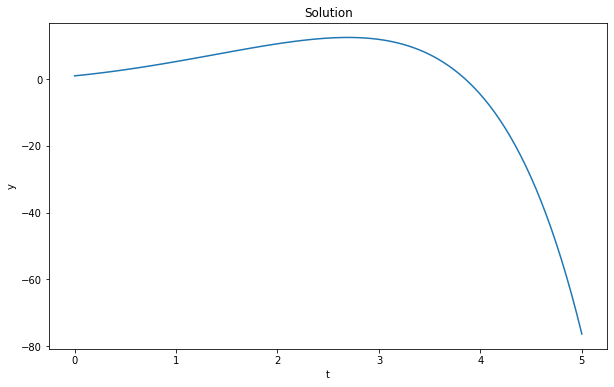

In [44]:
plt.figure(figsize = (10,6))
plt.plot(time_points, solution)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solution')
plt.show()

The equation we discussed can be solved analytically. It is encouraged you try it out !!!

## Higher Order ODEs

The solver cannot solve a higher order ODE as it is, since it is more computationally expensive and error prone, given the algorithms implemented by the solver. Instead, we are supposed to manually break up the higher order ODE into several first order ODEs and then solve them together. In principle, an $n^{th}$ order ODE can be broken up into n first order ODEs.

We will try to solve the ODE representing a [Damped Simple Harmonic Oscillator(DSHO)](http://spiff.rit.edu/classes/phys312/workshops/w5b/damped_theory.html):
$$m\frac{d^2x}{dt^2} + b\frac{dx}{dt} + kx = 0$$

This ODE can be solved analytically and has been extensively studied. We will demonstrate how to numerically solve this ODE and general things to be kept in mind when solving for any model. Here m denotes the mass of the particle under oscillation, k denotes the stiffness of the spring, b denotes the damping coefficient of the external medium. x denotes the displacement from the mean position and t the time.

How many parameters are there in this equation. The answer is 2 and not 3, since you can divide by m and get $\frac{b}{m}$ and $\frac{k}{m}$ as new independent parameters. We will call them $2\gamma$ and $\epsilon$ respectively. Hence our ODE becomes
$$\frac{d^2x}{dt^2} + 2\gamma\frac{dx}{dt} + \epsilon x = 0$$, the factor of 2 in $\gamma$ is for the purpose of convenience. It is always recommended to simplify the ODE as much as possible. Theory of [Damped Simple Harmonic Oscillator(DSHO)](http://spiff.rit.edu/classes/phys312/workshops/w5b/damped_theory.html) predicts that different kinds of behaviour can be seen for different parameter values:
* Underdamped for $\epsilon > \gamma^2$, the particle exhibits decaying oscillatory motion around mean position.
* Overdamped for $\epsilon < \gamma^2$, If particle is released from the extreme position, it will slowly come towards the mean position without overshooting it.
* Critically damped for $\epsilon = \gamma^2$, the boundary between underdamped and overdamped.

As mentioned earlier, we need to break this equation into 2 first order ODEs. This can be done as follows:
Let $y = \frac{dx}{dt}$
Then the ODE becomes
$$\frac{dy}{dt} + 2\gamma y + \epsilon x = 0$$

How do we get the second equation? Note that we already have it when we defined $y = \frac{dx}{dt}$. Note that y also represents the velocity.

Thus finally, the system of first order ODEs that we need to simultaneously solve is:
$$\frac{dx}{dt} = y$$ and $$\frac{dy}{dt} = -2\gamma y -\epsilon x$$
Now our model is ready to be solved. We follow almost the same procedure as we followed previously.

We refer to the pair X = [x,y] at any time as the state of the system. So the differential equation is finally of the form $$\frac{dX}{dt} = f(X)$$, where X is a vector.

In [45]:
def shm_derivative(t, state, gamma, eps):
    #time is the independent variable, state is the dependent variable
    x = state[0]
    y = state[1]
    return [y, -2*gamma*y - eps*x] #We return the list of derivatives of each individual ODE

In [46]:
t_span = (0,10) #t0 and tf

In [47]:
t = np.linspace(0,10,1000) #evaluation time points

In [48]:
init_state = [1,0] #The initial state of the system

Since we have 2 ODEs, we require 2 initial conditions. The first element of the list is the initial codition for our first ODE, i.e. x(t0) = 1, and the second element of the list is the initial condition for our second ODE, i.e. y(t0) = 0. What does this mean physically in reference to our model?

In [49]:
#Setting the parameter values
#Note that eps > gamma^2, thus this deontes underdamped oscillations
gamma = 0.5
eps = 2

Lets call the solver and integrate!!!

In [50]:
sol = solve_ivp(shm_derivative, t_span, init_state, t_eval = t, args = (gamma, eps))

In [51]:
#obtain the solution from sol object
state = sol.y
print(state.shape)
#Uncomment below to see the solution

(2, 1000)


Thus state is a (2,1000) array. The first row denotes the value of the first state variable (x) at the required time points and the second row denotes the value of the second state variable(y) at the required time points. Note that for our system, x denotes the displacement of the particle from mean position and y simply denotes the velocity of the particle.

In [52]:
#access x
x_underdamped = state[0]
#access y (the velocity)
y_underdamped = state[1]

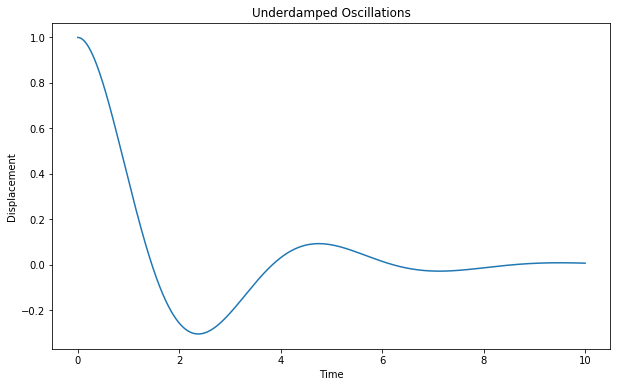

In [53]:
#Lets plot the solution
plt.figure(figsize = (10,6))
plt.plot(t, x_underdamped)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Underdamped Oscillations')
plt.show()

Similarly, one can get the velocity vs time plots

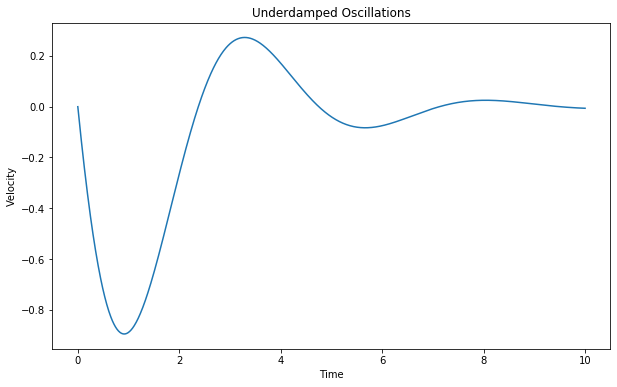

In [54]:
plt.figure(figsize = (10,6))
plt.plot(t, y_underdamped)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Underdamped Oscillations')
plt.show()

Similarly, you can get the plots for overdamped as well as critically damped oscillations, by tweaking the parameters. It is encouraged you try it out.

Thus so far, we have seen how to solve ODEs using solve_ivp. solve_ivp has many other functionalities that you can check out [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html).

## Your Assignment...

.. should you chose to accept it

Stars are a result of complex hydrodynamic, thermodynamic, chemical and nuclear processes happening inside them. For long astrophysicists have desired more and more accurate mathematical models in order to explain structure as well as processes going on inside stars. Most of these models are very complex, both in theory and also in solving them numerically. Refer [here](https://en.wikipedia.org/wiki/Stellar_structure) to know more. But there have been instructive yet simplistic models proposed which can be used to get a good overview about the physics of these celestial objects.

One such model is the [polytropic](https://www.astro.princeton.edu/~gk/A403/polytrop.pdf) model.

The polytropic model can be obtained by combining hydrostatic equilibrium with the equation of conservation of mass and then assuming an equation of state.

The final equation, also known as the Lane-Emden equation is given by: $$\frac{1}{\xi^2}\frac{d}{d\xi}\left(\xi^2\frac{d\theta}{d\xi}\right) = -\theta^n$$.

Here $\xi$ is called the scaled radius and $\theta$ the polytropic temperature. The solution of the equation for each value of n is called a polytrope. The following relations are obeyed for this model:
* $P = K\rho^{1+\frac{1}{n}}$ . P, $\rho$ being the pressure and density at each point respectively, n is called the polytropic index and K being the polytropic constant.
* $\rho = \rho_c\theta^n$. Here $\rho_c$ is the density at the center of the star.
* $P = P_c\theta^{n+1}$. Here $P_c$ is the pressure at the center of the star. (You would have to use this to obtain the initial conditions).
* $r = \alpha\xi$. r is the radial coordinate within the star and $\alpha$ is called the length constant, given by $$\alpha^2 = \frac{K(n+1)\rho_c^{1-\frac{1}{n}}}{4 \pi G}$$

Your task is to numerically solve the Lane-Emden equation for n = 0,1,2,3,4,5 (Hint: You need to perform a task repeatedly. What do we do when we need to perform similar tasks repeatedly?) and make the plots of $\theta$ vs $\xi$ in each case. Before deciding to jump aboard, you should answer the following questions:
* What are the dependent and the independent variables you need to consider?
* What are the model parameters?
* How many initial conditions will you need?
* What are the initial conditions? Note that you can't supply arbitrary initial conditions, since the fundamental scientific constraint you have is that the star you have created must be physical !!! (Hint: What happens at the center of a star?)

Note that since you don't know the radius of the star beforehand, assume a reasonable span of $\xi$ on which you would want to integrate the model. You could try different such spans and then evaluate in each case. Also, since $\xi$ appears in the denominator of the model, you might get ZeroDivisionError while solving, so instead of starting from $\xi = 0$, choose a small value of $\xi$ close to 0 to start with.

After you have done this much, try to answer the following question:

Suppose you are given the pressure and density values at the center and the polytropic index of a star obeying the polytropic equation, how would you calculate its radius?